In [1]:
import os
import shutil

from spins.invdes import problem_graph
from spins.invdes.problem_graph import optplan

In [2]:
__file__ = '/home/zuoqizhong/Photonics/grating_coupler_new'

CUR_DIR = os.path.dirname(os.path.realpath(__file__))


def test_grating(tmpdir):
    folder = str(tmpdir.mkdir("grating"))

    sim_space = grating.create_sim_space(
        os.path.join(folder, "sim_fg.gds"),
        os.path.join(folder, "sim_bg.gds"),
        box_thickness=2000,
        wg_thickness=220,
        etch_frac=0.5)
    obj, monitors = grating.create_objective(
        sim_space, wg_thickness=220, grating_len=10000)
    trans_list = grating.create_transformations(
        obj, monitors, 1, 2, sim_space, min_feature=100)
    plan = optplan.OptimizationPlan(transformations=trans_list)

    problem_graph.run_plan(plan, folder)


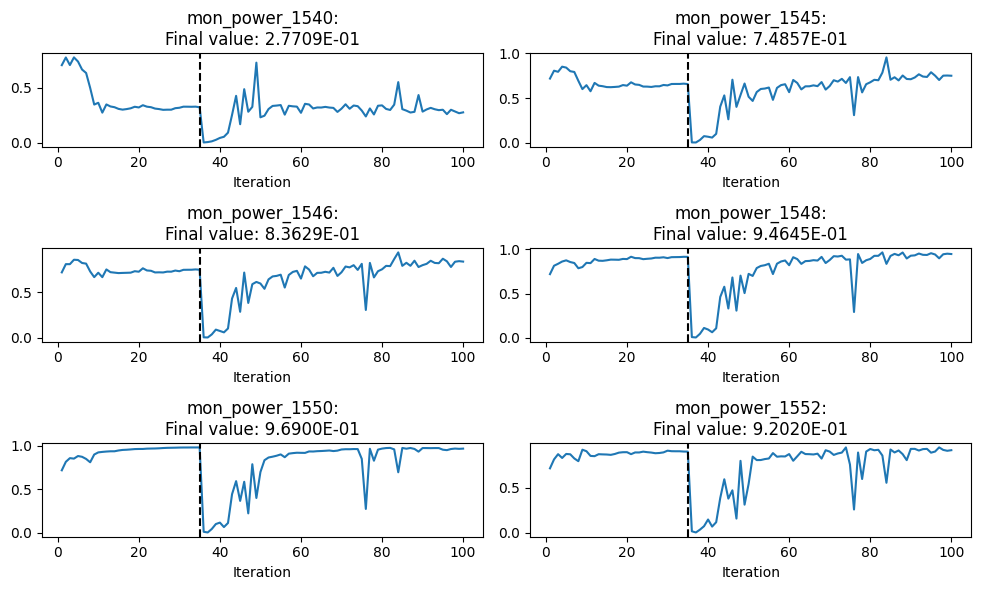

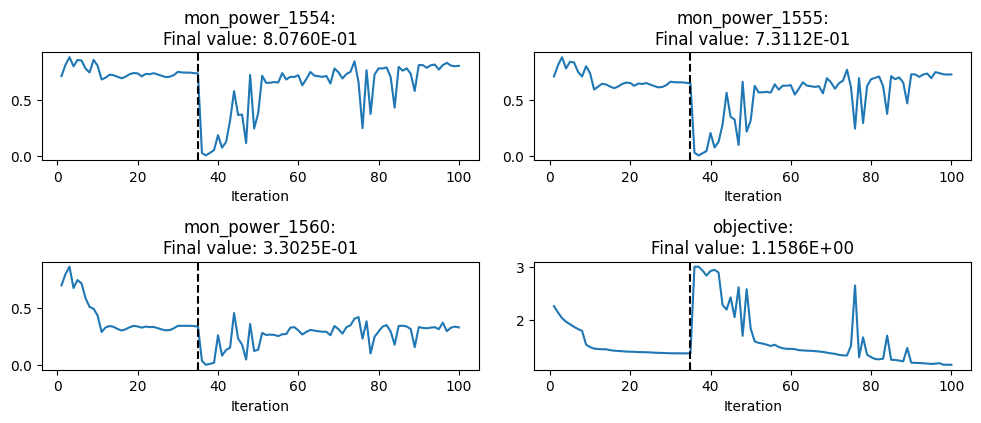

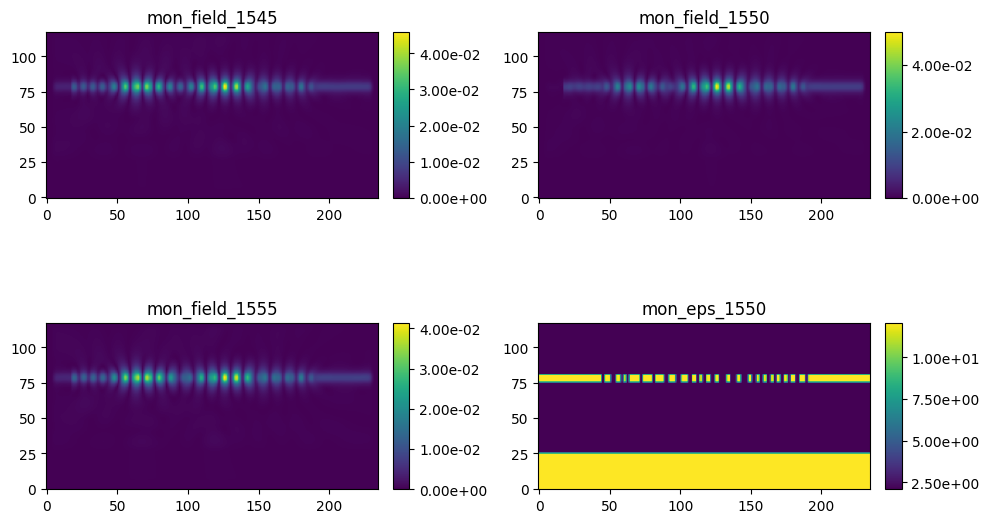

In [1]:
from spins.invdes.problem_graph import log_tools
from spins.invdes.problem_graph import workspace

save_folder = '/home/zqzhong/Photonics/spins-b/grating_coupler_new/grating_new_6000'
__file__ = '/home/zqzhong/Photonics/spins-b/grating_coupler_new/'

log_df = log_tools.create_log_data_frame(
    log_tools.load_all_logs(save_folder))
monitor_descriptions = log_tools.load_from_yml(
    os.path.join(os.path.dirname(__file__), "monitor_spec.yml"))
log_tools.plot_monitor_data(log_df, monitor_descriptions)

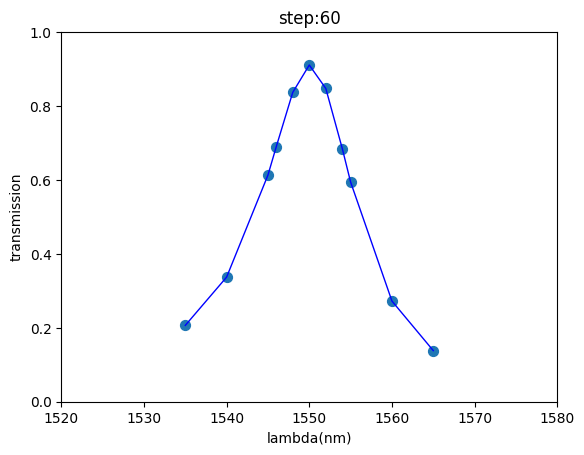

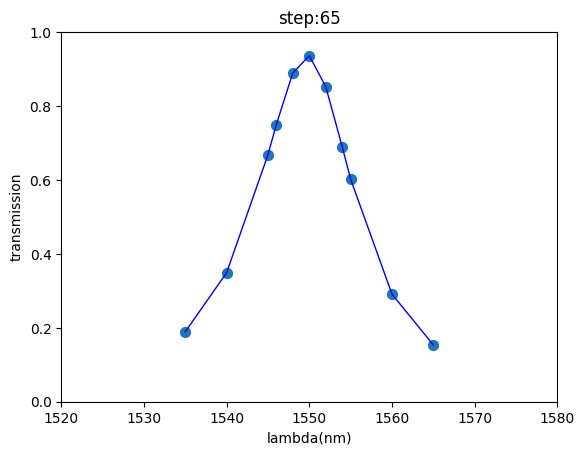

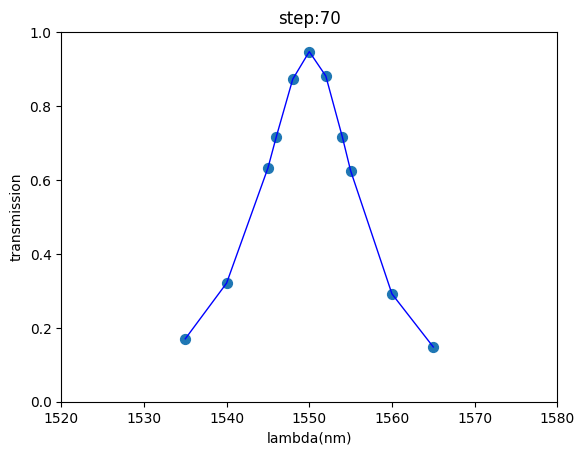

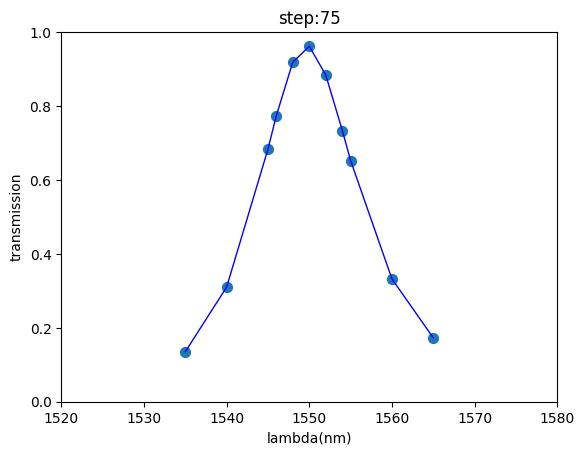

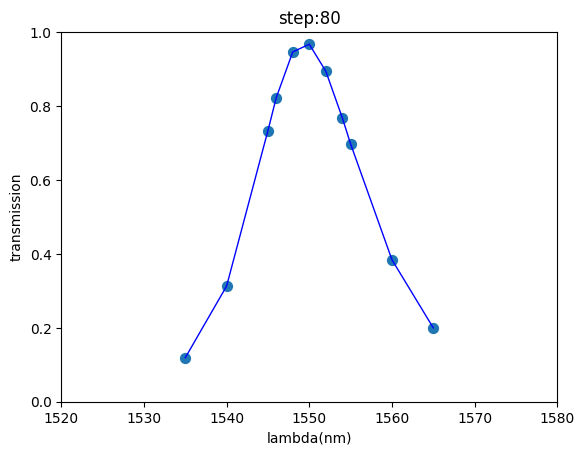

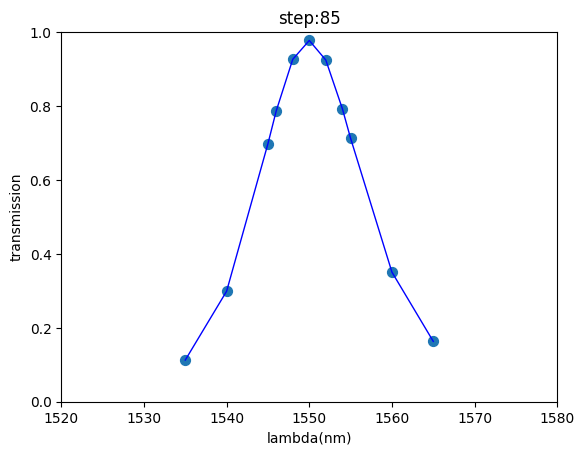

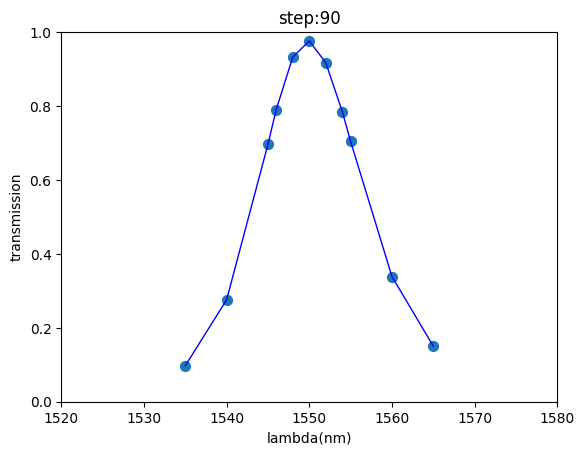

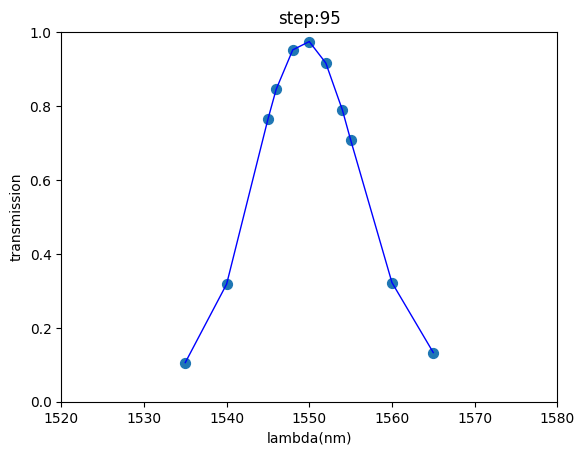

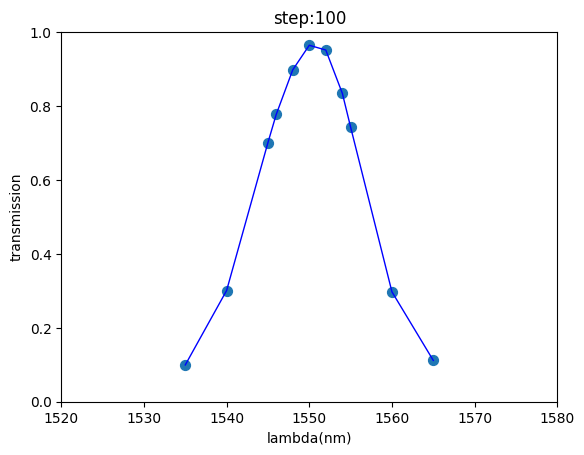

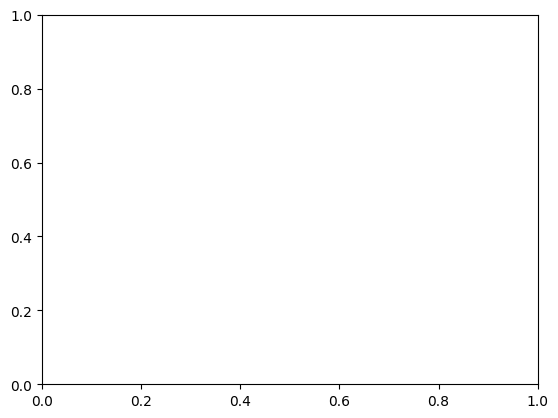

In [3]:
from configparser import Interpolation
import matplotlib.pyplot as plt
import pickle

step_num = 60
for i in range(104-step_num):
    filepath = '/home/zqzhong/Photonics/spins-b/grating_coupler_new/grating_new_6000/step'+ str(step_num) +'.pkl'
    f = open(filepath,'rb')
    info = pickle.load(f)
    info1 = info['monitor_data']

    X = [1535, 1540, 1545, 1546, 1548, 1550, 1552, 1554, 1555, 1560, 1565]
    Y = [info1['mon_power_1535'],info1['mon_power_1540'],info1['mon_power_1545'],info1['mon_power_1546'],info1['mon_power_1548'],info1['mon_power_1550'],info1['mon_power_1552'],info1['mon_power_1554'],info1['mon_power_1555'],info1['mon_power_1560'],info1['mon_power_1565']]
    plt.title('step:'+str(step_num))
    plt.scatter(X, Y, s=50)
    plt.xlabel('lambda(nm)')
    plt.ylabel('transmission')
    plt.xlim(1520, 1580)
    plt.ylim(0, 1)
    plt.plot(X, Y, linestyle='-', linewidth=1, color='blue')
    plt.savefig('/home/zqzhong/Photonics/spins-b/grating_coupler_new/grating_savefig6/'+str(step_num)+'.png')
    if(step_num%5==0):
        plt.savefig('/home/zqzhong/Photonics/spins-b/grating_coupler_new/grating_savefig6_per5/'+str(step_num)+'.png')
        plt.show()
    else:
        plt.cla()
    
    step_num += 1